In [1]:
# Standard libray
import sys, os

# Common library
import numpy as np
import scipy
from pylab import *
import scipy.interpolate

# ROOT>....
import uproot

# Custom helper functions
import MuHelper.muhelper.helper_basic as hp

In [2]:
# working_dir = "/mnt/sda2/tofpet_data/function_gen"
working_dir = "/mnt/sda2/tofpet_data/two_preamp"

# Open root file

In [31]:
filename = f"{working_dir}/data_test_single.root"
file = uproot.open(filename) # or root:// or http://
tree = file["data"]
data = tree.arrays(tree.keys())
keys = data.fields
print(keys)

ch = data["channelID"]
t1 = data['time'][ch==9]
t2 = data['time'][ch==38]
dt = t1-t2
print(mean(dt[abs(dt)<2000]))

['step1', 'step2', 'time', 'channelID', 'tot', 'energy', 'tacID', 'xi', 'yi', 'x', 'y', 'z', 'tqT', 'tqE']


# Open coincidence txt file

In [32]:
def read_coinc_txt(filename):
    # 6 columns of time, energy, id, time, energy, id
    data = np.loadtxt(filename,usecols=[2,3,4,7,8,9])
    return data

filename = f"{working_dir}/data_coinc_test_1_coinc.dat"

data = read_coinc_txt(filename)
dt = data[:,0]-data[:,3]
e1 = data[:,1]
e2 = data[:,4]

In [33]:
# def tot_energy_calib(tot_meas, e_low, e_high):
    #

tot_meas = e1;
e_low=4
e_high=25

n,ibins = np.histogram(tot_meas, bins=100)
n_cdf = np.cumsum(n)/np.sum(n)
energy_cdf = n_cdf*(e_high-e_low)+e_low
tot_input = np.concatenate(([ibins[0]],ibins[1:]))
energy_output = np.concatenate(([0],energy_cdf))

calib_func = scipy.interpolate.interp1d(tot_input, energy_output, bounds_error=None)

# plot(tot_input, energy_output)

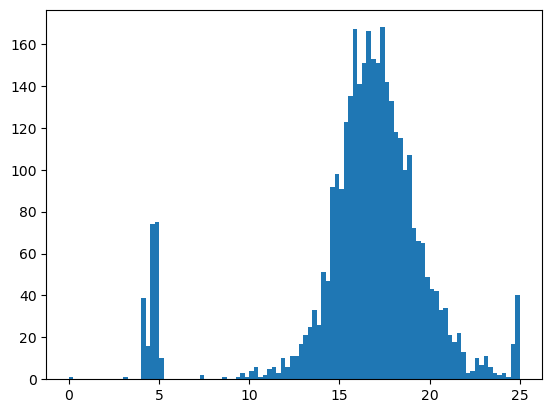

In [34]:
e1_calib = calib_func(e1)
hist(e1_calib,bins=100);

Text(0.5, 0, 'Energy')

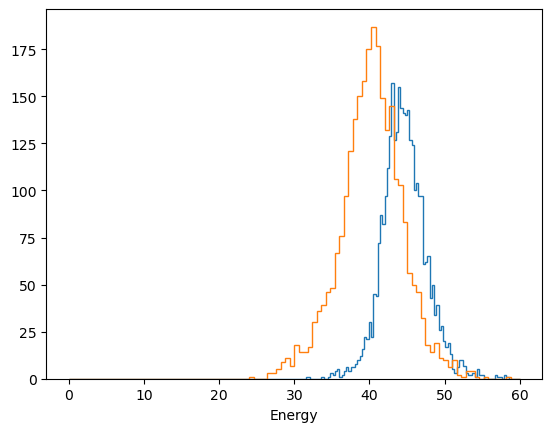

In [35]:
hist(data[:,1],bins=200,histtype="step", range=(0,60));
hist(data[:,4],bins=100,histtype="step", range=(0,60));
xlabel("Energy")

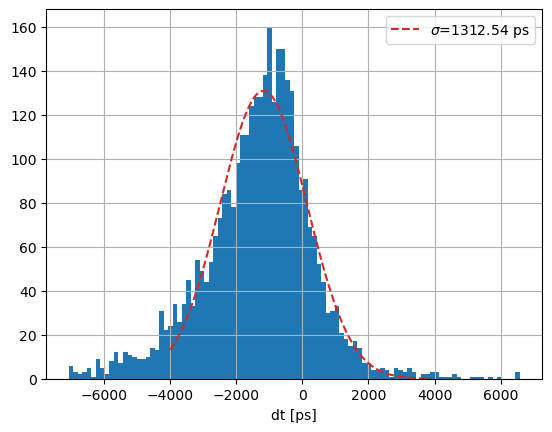

In [36]:
# mask = data[:,1]<120
# h=hist(dt[mask],bins=100, range=(-7000,6000),histtype="step");
# mask = abs(data[:,1]-140)<20
mask = data[:,1]>0

# h=hist(dt[mask],bins=100, range=(-9000,6000),histtype="step");
h=hist(dt/sqrt(2),bins=100);
popt, pcov, info, f = hp.fit_hist("gauss", h, fit_range=[-4000,4000],label="$\sigma$={popt[2]:.2f} ps", color="C3", linestyle="--");
legend()
xlabel("dt [ps]")
grid()


# yscale('log')
# ylim(1,)

223


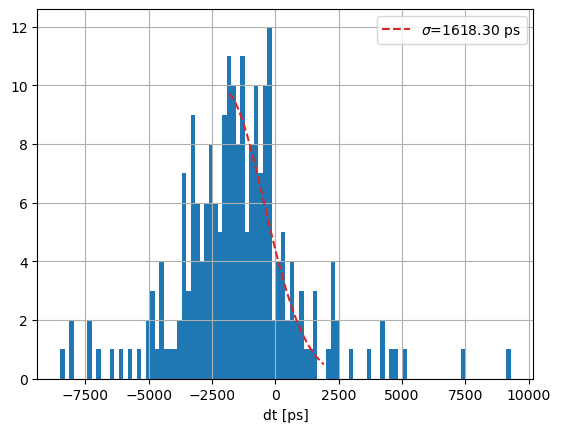

In [37]:
# mask = data[:,1]<120
# h=hist(dt[mask],bins=100, range=(-7000,6000),histtype="step");
# mask = abs(data[:,1]-140)<20
mask = abs(e1_calib[:] - 5)<5

hn,hbins=np.histogram(dt[mask],bins=100)
h=hist(dt[mask],bins=100)
print(sum(hn))
#h=hist(dt,bins=100);
popt, pcov, info, f = hp.fit_hist("gauss", h, fit_range=[-2000,2000],label="$\sigma$={popt[2]:.2f} ps", color="C3", linestyle="--");
legend()
xlabel("dt [ps]")
grid()
mean1 = popt[1]
dev1 = popt[2]
# yscale('log')
# ylim(1,)

475


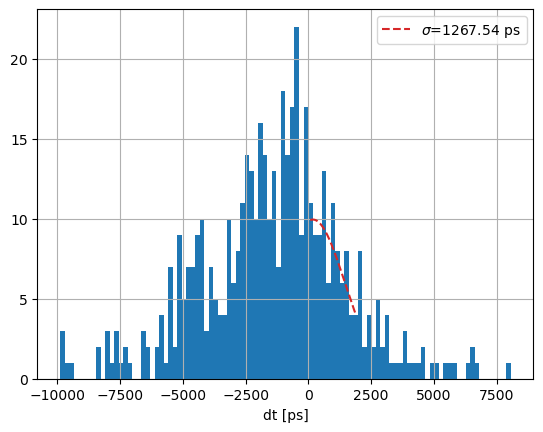

In [38]:
# mask = data[:,1]<120
# h=hist(dt[mask],bins=100, range=(-7000,6000),histtype="step");
# mask = abs(data[:,1]-140)<20
mask = abs(e1_calib[:] - 12.5)<2.5

hn,hbins=np.histogram(dt[mask],bins=100)
h=hist(dt[mask],bins=100)
print(sum(hn))
#h=hist(dt,bins=100);
popt, pcov, info, f = hp.fit_hist("gauss", h, fit_range=[-0,2000],label="$\sigma$={popt[2]:.2f} ps", color="C3", linestyle="--");
legend()
xlabel("dt [ps]")
grid()
mean2 = popt[1]
dev2 = popt[2]
# yscale('log')
# ylim(1,)

310


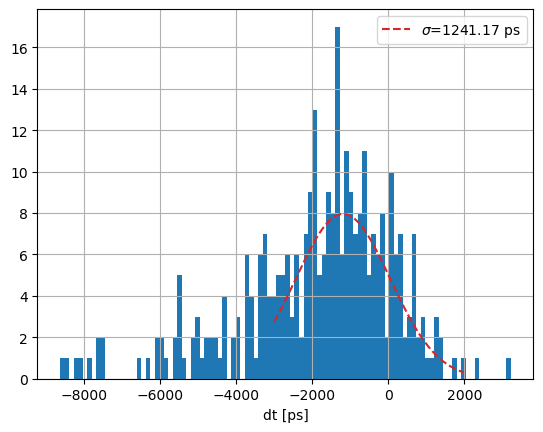

In [43]:
# mask = data[:,1]<120
# h=hist(dt[mask],bins=100, range=(-7000,6000),histtype="step");
# mask = abs(data[:,1]-140)<20
mask = abs(e1_calib[:] - 17.5)<0.25

hn,hbins=np.histogram(dt[mask],bins=100)
h=hist(dt[mask],bins=100)
print(sum(hn))
#h=hist(dt,bins=100);
popt, pcov, info, f = hp.fit_hist("gauss", h, fit_range=[-3000,2000],label="$\sigma$={popt[2]:.2f} ps", color="C3", linestyle="--");
legend()
xlabel("dt [ps]")
grid()
mean3 = popt[1]
dev3 = popt[2]

# yscale('log')
# ylim(1,)

1553


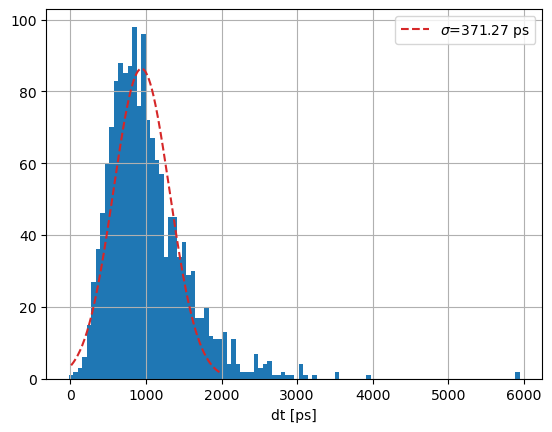

In [56]:
# mask = data[:,1]<120
# h=hist(dt[mask],bins=100, range=(-7000,6000),histtype="step");
# mask = abs(data[:,1]-140)<20
mask = abs(e1_calib[:] - 22.5)<2.5

hn,hbins=np.histogram(dt[mask],bins=100)
h=hist(dt[mask],bins=100)
print(sum(hn))
#h=hist(dt,bins=100);
popt, pcov, info, f = hp.fit_hist("gauss", h, fit_range=[-0,2000],label="$\sigma$={popt[2]:.2f} ps", color="C3", linestyle="--");
legend()
xlabel("dt [ps]")
grid()
mean4 = popt[1]
dev4 = popt[2]
# yscale('log')
# ylim(1,)

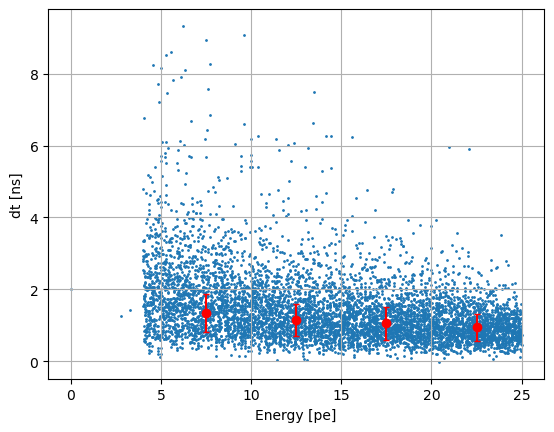

In [69]:
# scatter(e1, dt, s=1)
scatter(e1_calib, dt/1000, s=1)
errorbar(7.5,mean1/1e3,yerr=dev1/1e3,color="r",fmt="o",capsize=2)
errorbar(12.5,mean2/1e3,yerr=dev2/1e3,color="r",fmt="o",capsize=2)
errorbar(17.5,mean3/1e3,yerr=dev3/1e3,color="r",fmt="o",capsize=2)
errorbar(22.5,mean4/1e3,yerr=dev4/1e3,color="r",fmt="o",capsize=2)
xlabel("Energy [pe]")
ylabel("dt [ns]")
grid()

In [58]:
25/(30*6)*25
# 15 pe at vth_t2=20
# 20*15/100

3.4722222222222223